c:\Users\jos_m\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\jos_m\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\jos_m\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\jos_m\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: '

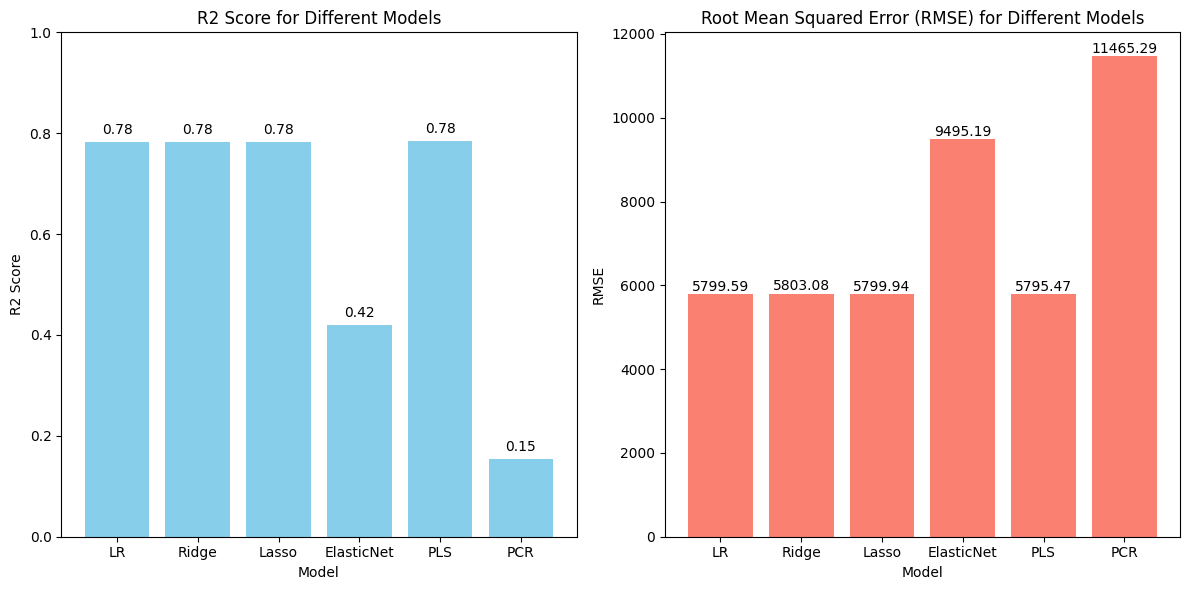

{'LR': 5799.587091438355, 'Ridge': 5803.084710238366, 'Lasso': 5799.94304331927, 'ElasticNet': 9495.187747959648, 'PLS': 5795.474327135228, 'PCR': 11465.29318203393}
{'LR': 0.7833463107364539, 'Ridge': 0.7830849126391299, 'Lasso': 0.7833197155138745, 'ElasticNet': 0.41926359395870205, 'PLS': 0.7836534807483222, 'PCR': 0.15327522172405428}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

insurance = pd.read_csv('insurance.csv')


df = insurance.copy()
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LR': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'PLS': PLSRegression(),
    'PCR': LinearRegression()
}

r2_scores = {}
rmse_values = {}

for name, model in models.items():
    if name == 'PCR':
        pca = PCA(n_components=2)
        X_train_reduced = pca.fit_transform(X_train)
        X_test_reduced = pca.transform(X_test)
        model.fit(X_train_reduced, y_train)
        y_pred = model.predict(X_test_reduced)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
    r2_scores[name] = r2_score(y_test, y_pred)
    rmse_values[name] = mean_squared_error(y_test, y_pred, squared=False)

#r2 score graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score for Different Models')
plt.ylim(0, 1)

for name, score in r2_scores.items():
    plt.text(name, score + 0.01, f'{score:.2f}', ha='center', va='bottom')

# RMSE graph
plt.subplot(1, 2, 2)
plt.bar(rmse_values.keys(), rmse_values.values(), color='salmon')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) for Different Models')

for name, rmse in rmse_values.items():
    plt.text(name, rmse + 5, f'{rmse:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(rmse_values)
print(r2_scores)